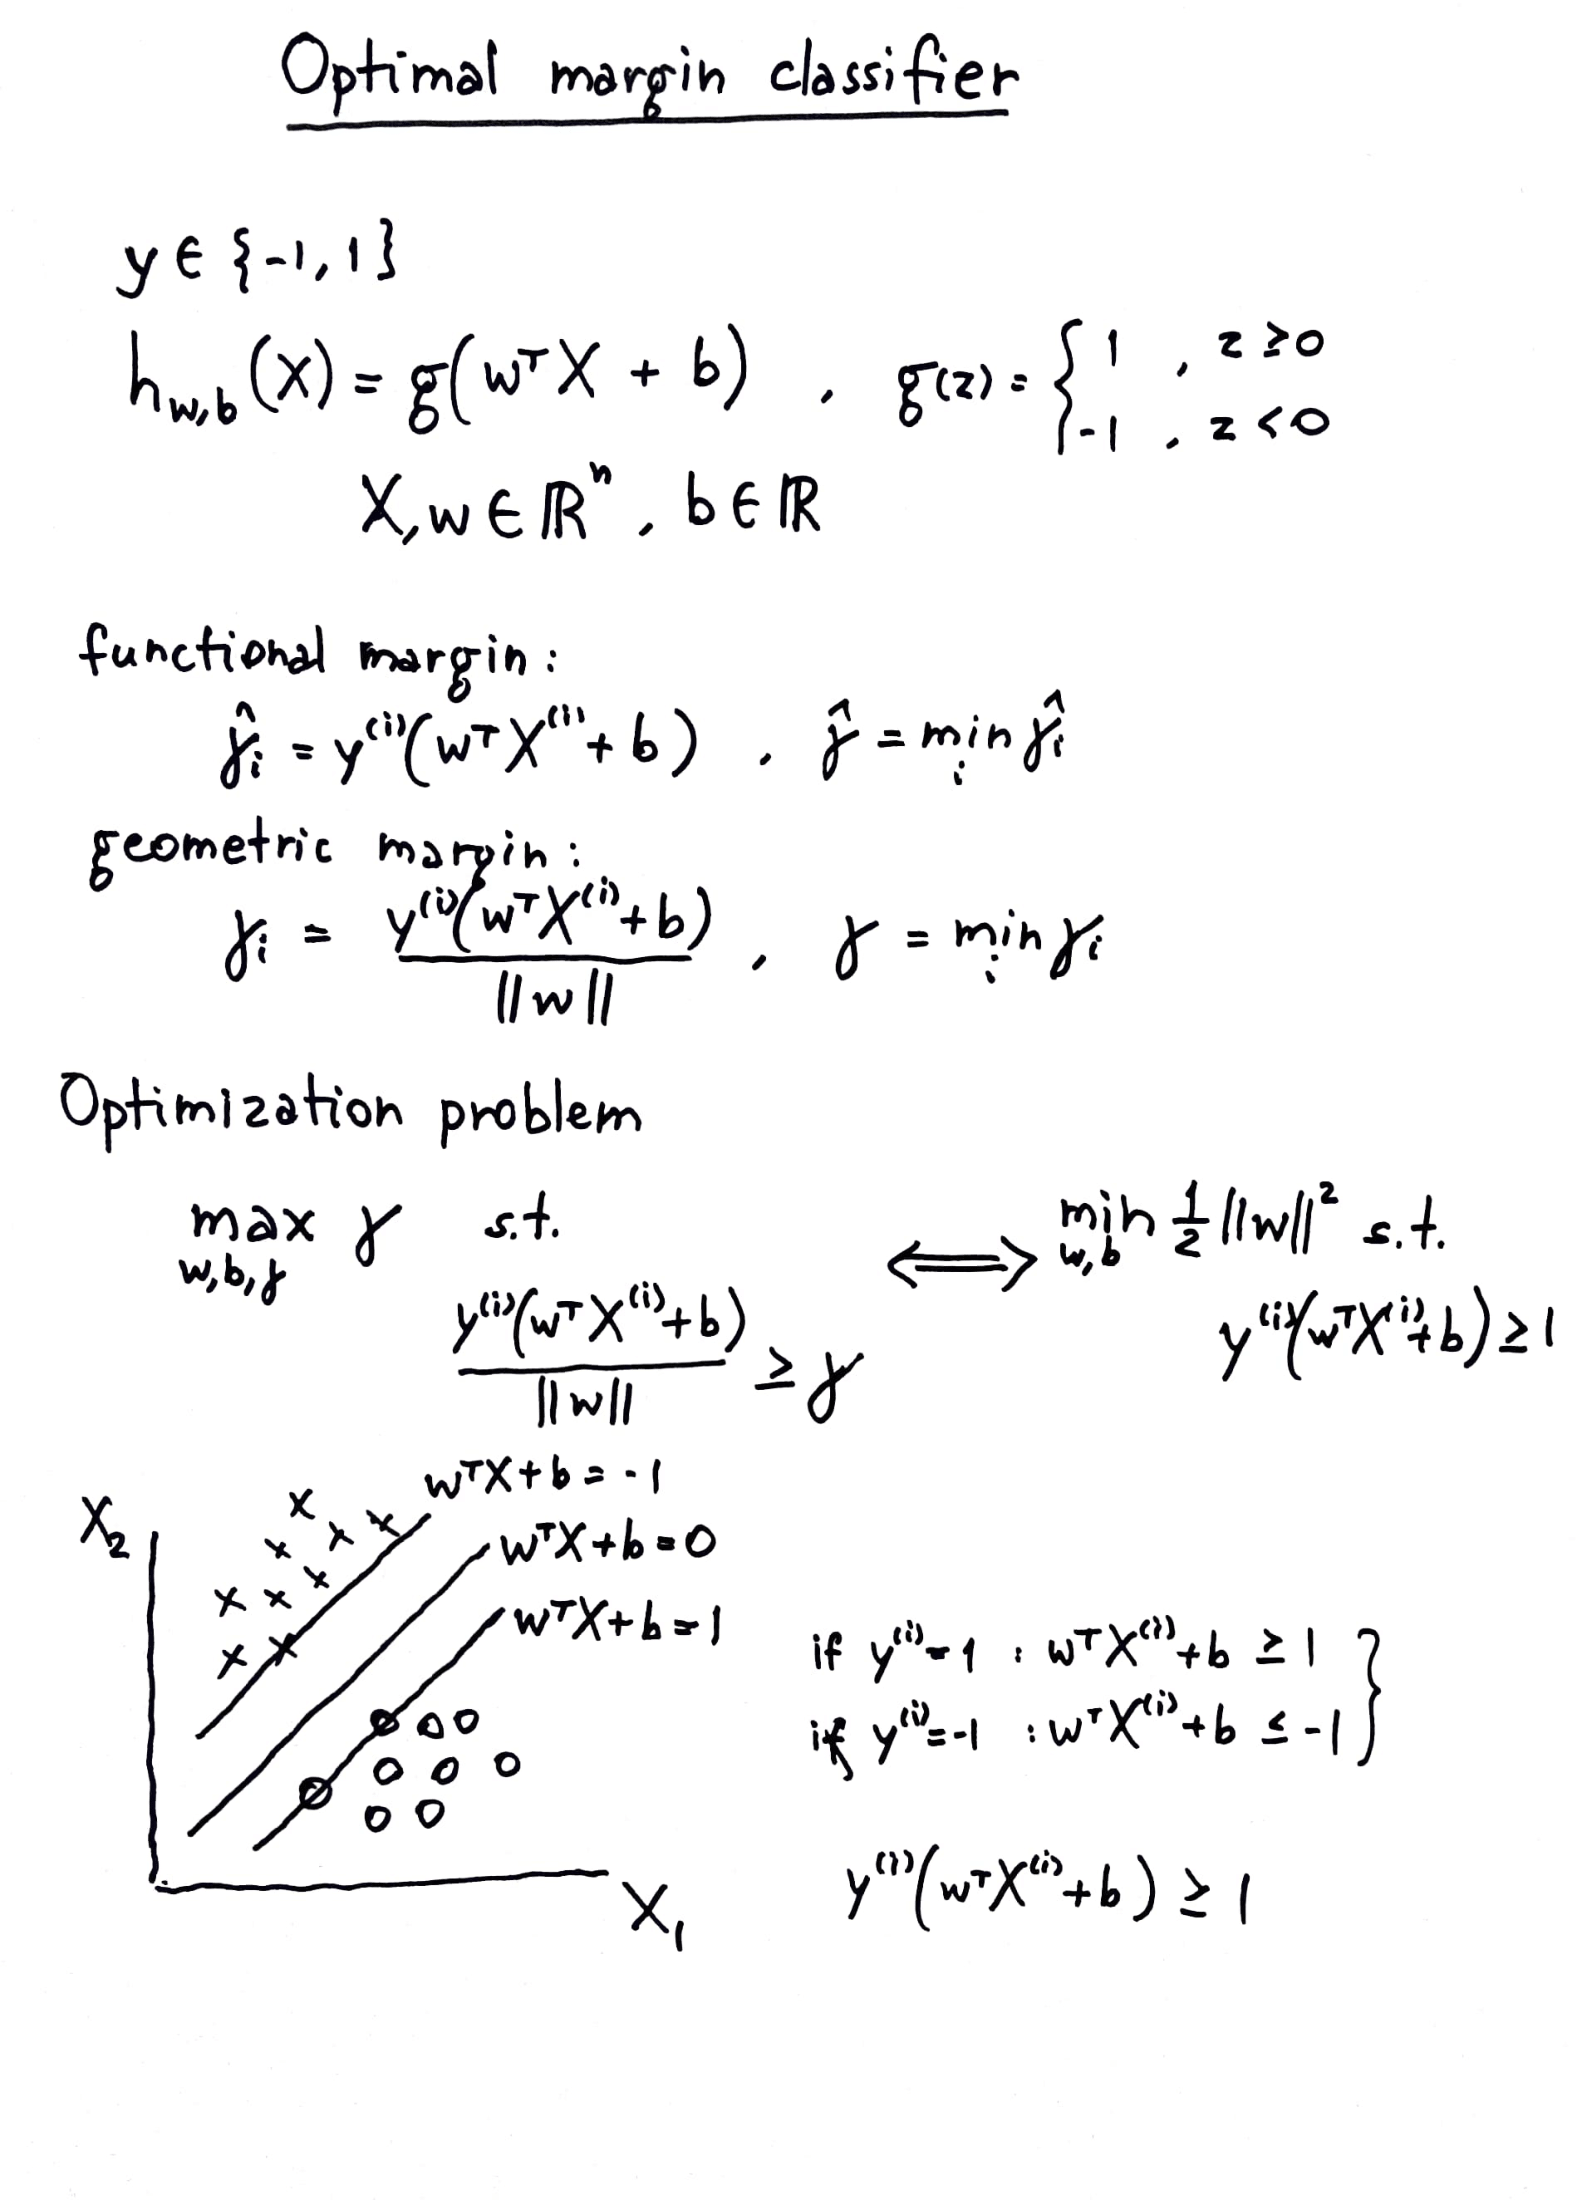

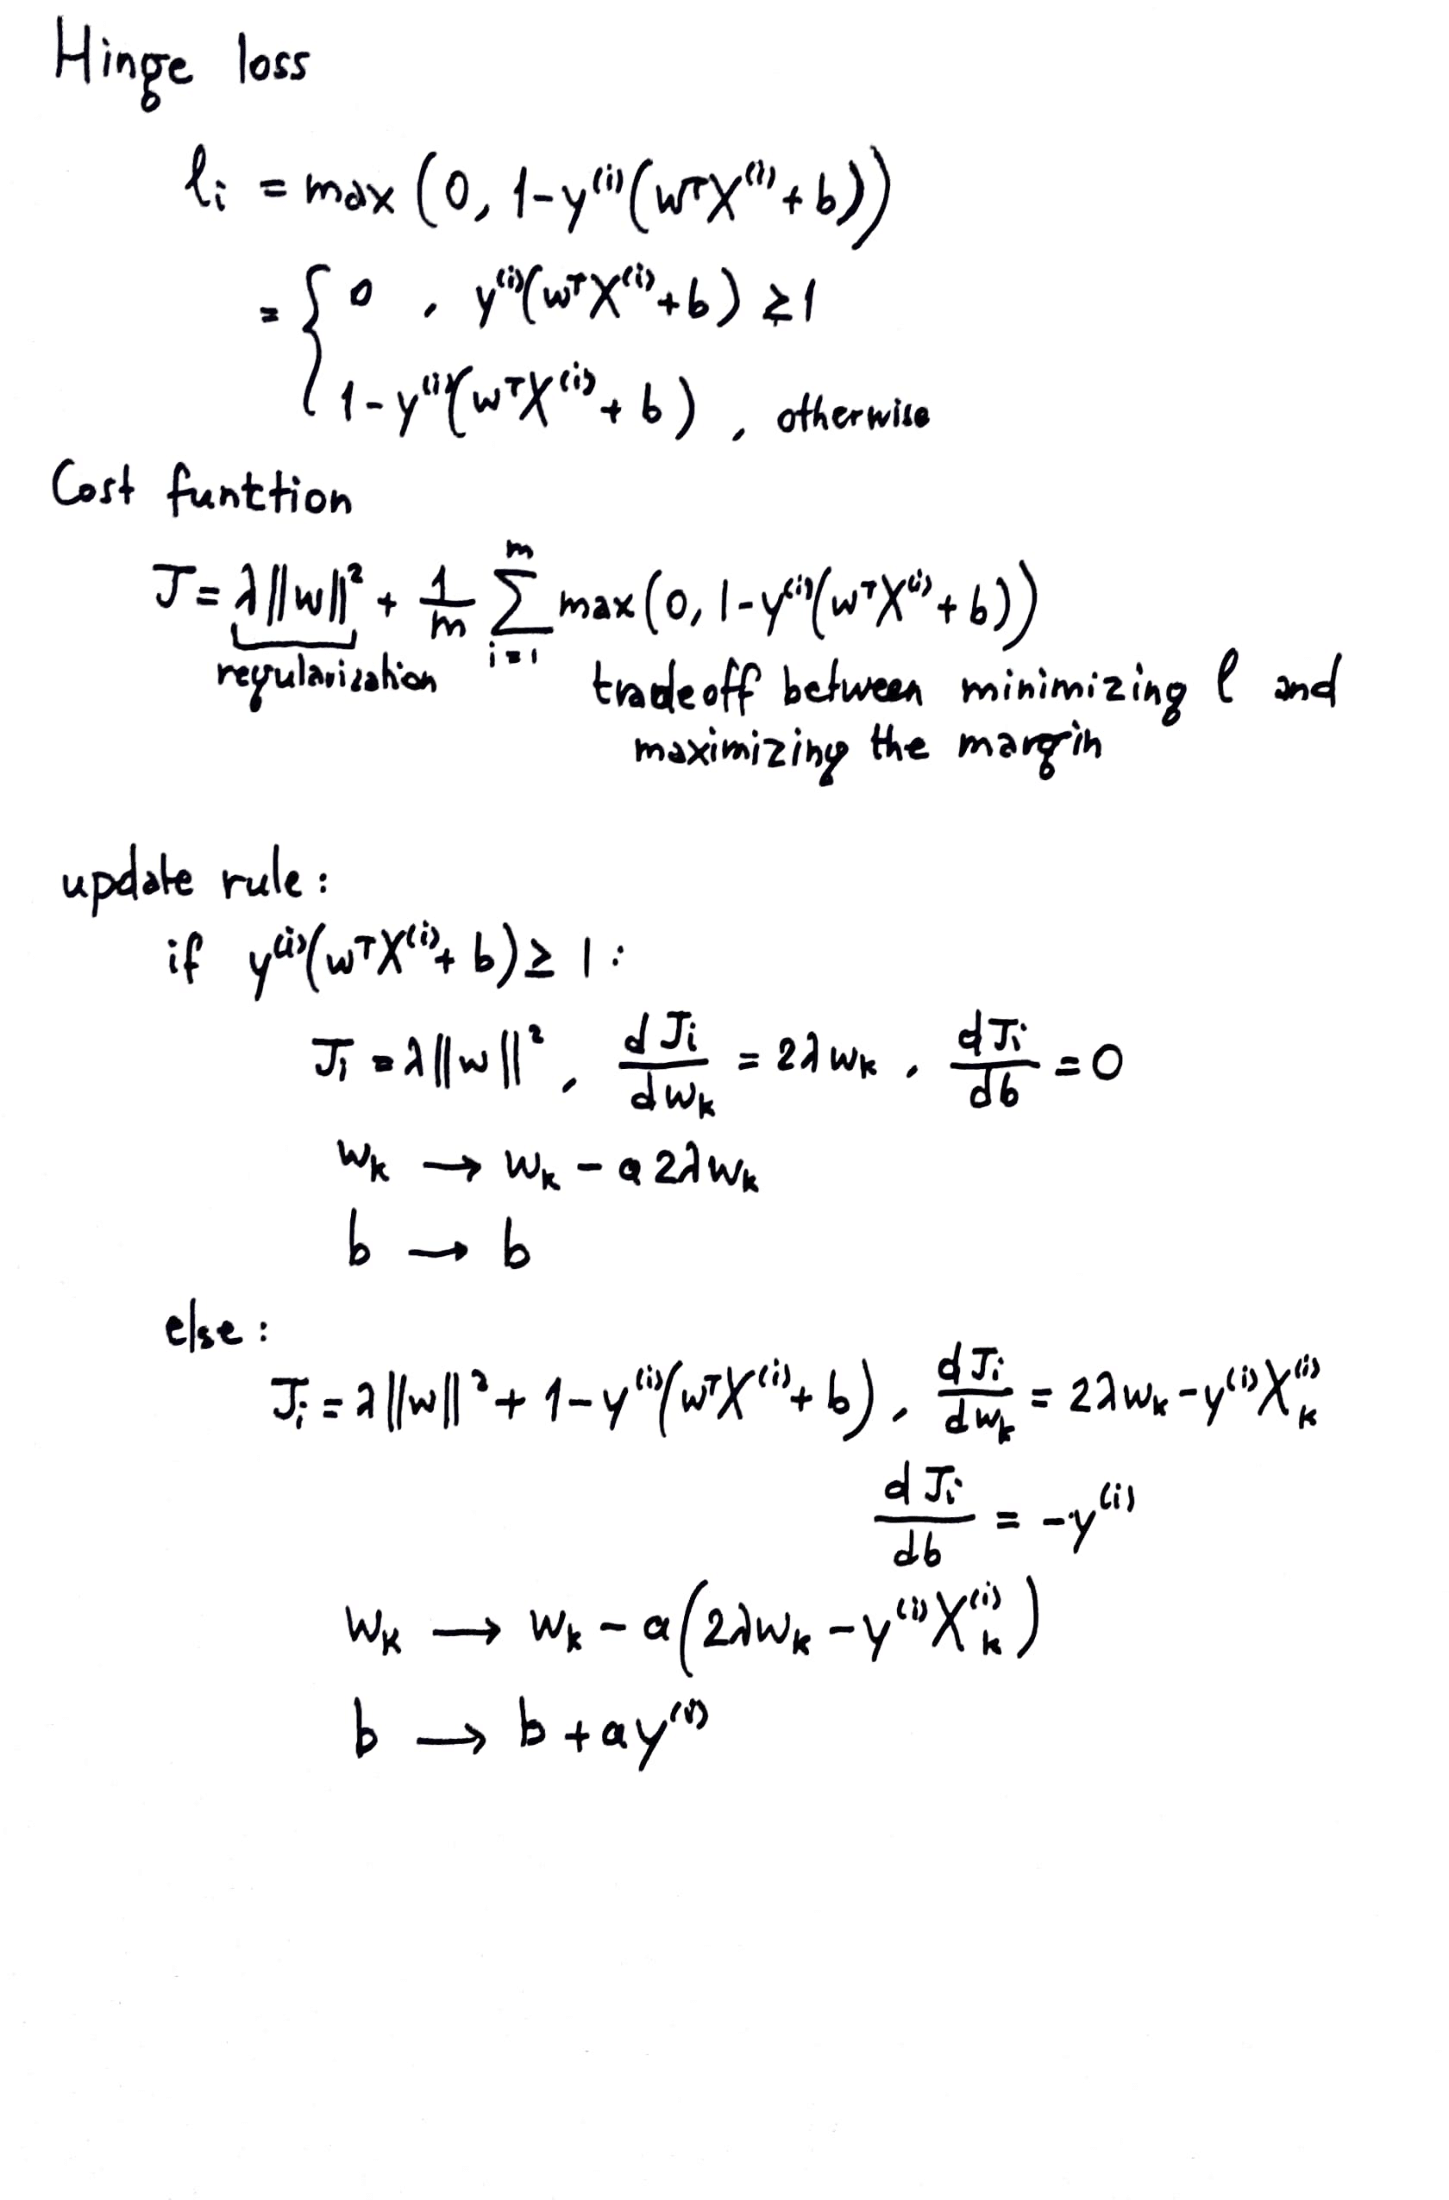

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
class SVM:
    
    def __init__(self, lr=0.001, lambda_par=0.01, n_iters=1000):
        self.lr = lr
        self.lambda_par = lambda_par
        self.n_iters = n_iters
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <=0, -1, 1) # make sure that the class has the labels -1,1
        self.w = np.zeros(n_features)
        self.b = 0
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w = self.w - self.lr*2*self.lambda_par*self.w
                else:
                    self.w = self.w - self.lr*(2*self.lambda_par*self.w - np.dot(y_[idx], x_i))
                    self.b = self.b + self.lr*y_[idx]
                    
    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)

In [3]:
X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05,
                          random_state=40)
y = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
clf = SVM()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
print('SVM classification accuracy ', accuracy(y_test, predictions))

SVM classification accuracy  1.0


(-13.231411985451054, 0.5515986557362416)

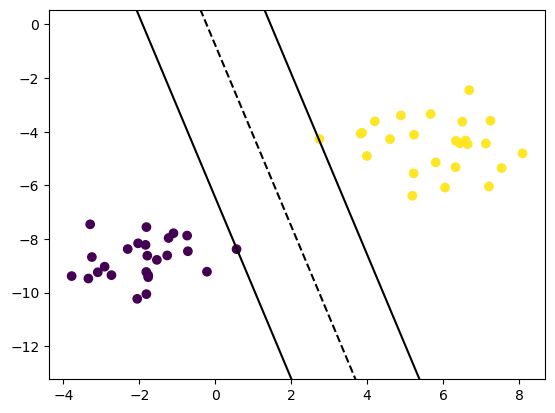

In [4]:
def get_hyperplane_value(x, w, b, offset):
    return (-w[0]*x - b + offset) / w[1]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X[:,0], X[:,1], c=y, marker='o')
x0_1, x0_2 = np.amin(X[:,0]), np.amax(X[:,0])
x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)
x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)
x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)
ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k--')
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'k')
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'k')
x1_min, x1_max = np.amin(X[:,1]), np.amax(X[:,1])
ax.set_ylim([x1_min-3, x1_max+3])